In [3]:
import pandas as pd

In [5]:
temp = pd.read_pickle(r'C:\Users\balaji\OneDrive\Desktop\Code\neuralcircuits_analysis\Results\AllUnitData_MUA_multistim.pickle')
temp.columns

Index(['mean_activity_ms', 'std_activity_ms', 'max_z_ms', 'summed_z_ms',
       'stable_response_ms', 'max_response_ms', 'first_pulse_ratio_ms',
       'second_pulse_ratio_ms', 'channel_number_ms', 'off_response_ms',
       'max_z_t_ms', 'max_z_t_quality_ms', 'total_z_t_ms',
       'total_z_t_quality_ms', 'subject', 'genotype', 'location',
       'penetration'],
      dtype='object')

# Generator code

V1 1.613245094728005 0.14114941008781465
LGN 0.3507234591841686 0.7330717817430278
S1 -2.215706271944762 0.05106470589479321
VPLM -3.166847798661973 0.01004128166880821


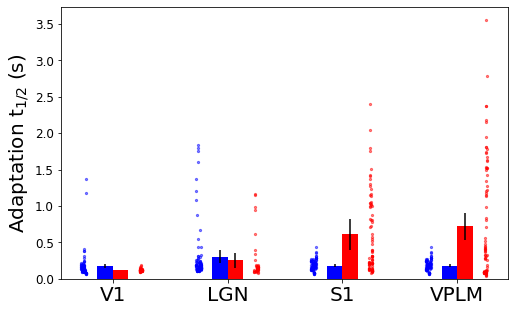

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from spike2_utils import lighten_color
import pandas as pd

def sem(inp):
    sd = np.std(inp)
    n = np.size(inp)
    return sd/np.sqrt(n)

allData = pd.read_pickle('Results\AllUnitData_MUA_multistim.pickle')


sig_thresh = 0.05/20

# make this a loop
areas = ['V1','LGN','S1','VPLM']
feature_of_interest = 'total_z_t_ms'
label_locs = []
fig,ax = plt.subplots(1,1,figsize=(8,5),sharey=True)
for j,area in enumerate(areas):
    
    hom_mr = allData.loc[(allData['location']==area) & (allData['genotype']=='HOM'),feature_of_interest]
    hom_sub = allData.loc[(allData['location']==area) & (allData['genotype']=='HOM'),'subject']
    goods = np.bitwise_and(hom_mr<1000,~np.isnan(hom_mr))
    hom_mr = hom_mr[goods]
    hom_sub = hom_sub[goods]
    
    wt_mr = allData.loc[(allData['location']==area) & (allData['genotype']=='WT'),feature_of_interest]
    wt_sub = allData.loc[(allData['location']==area) & (allData['genotype']=='WT'),'subject']
    goods = np.bitwise_and(wt_mr<1000,~np.isnan(wt_mr))
    wt_mr = wt_mr[goods]
    wt_sub = wt_sub[goods]
    
    space_between_genotype = 7.
    space_between_areas = 15.
    spread_between_individuals = 0.1
    mean_markersize = 10
    
    wt_mean_vals = []
    for i,sub in enumerate(np.unique(wt_sub)):
        data_points = wt_mr[wt_sub==sub]
        try:
            ax.scatter(space_between_areas*j-i*spread_between_individuals*np.ones_like(data_points),data_points,c='b',s=5,alpha=0.5)
        except:
            import pdb; pdb.set_trace()
        wt_mean_vals.append(np.nanmean(data_points))
    x_loc = space_between_areas*j+2.5
    #ax.plot(x_loc,np.mean(wt_mean_vals),marker='d',markersize=mean_markersize,color='b')
    #ax.plot([x_loc,x_loc],[np.mean(wt_mean_vals)-sem(wt_mean_vals),np.mean(wt_mean_vals)+sem(wt_mean_vals)],linewidth=3,color='b',)
    ax.bar(x_loc,np.mean(wt_mean_vals),yerr=sem(wt_mean_vals),color='b',width=2)
    hom_mean_vals = []
    for i,sub in enumerate(np.unique(hom_sub)):
        data_points  = hom_mr[hom_sub==sub]
        ax.scatter(space_between_genotype+space_between_areas*j+i*spread_between_individuals*np.ones_like(data_points),data_points,c='r',s=5,alpha=0.5)
        hom_mean_vals.append(np.nanmean(data_points))
    x_loc = space_between_genotype+space_between_areas*j-2.5
    #ax.plot(x_loc,np.mean(hom_mean_vals),marker='d',markersize=mean_markersize,color='r')
    #ax.plot([x_loc,x_loc],[np.mean(hom_mean_vals)-sem(hom_mean_vals),np.mean(hom_mean_vals)+sem(hom_mean_vals)],linewidth=3,color='r')
    ax.bar(x_loc,np.mean(hom_mean_vals),yerr=sem(hom_mean_vals),color='r',width=2)
    
    (t,p) = stats.ttest_ind(wt_mean_vals,hom_mean_vals)
    print(area,t,p)
    
    # labels
    label_locs.append(space_between_areas*j+space_between_genotype/2)
    
ax.set_xticks(label_locs)
ax.set_xticklabels(areas,fontsize=20)
ax.set_yticklabels(ax.get_yticks(),fontsize=12)
ax.set_ylabel('Adaptation t$_{1/2}$ (s)',fontsize=20)

fig.savefig(r'Results\AdaptationTC_Total_MS.svg')